# YAPAY SİNİR AĞLARI İLE FASHION MNIST VERİ SETİNİN MODELLENMESİ

Fashion-MNIST, Zalando Araştırma Ekibi tarafından geliştirilen ve kıyafetlerden oluşan bir veri setidir .  60.000 resim modeli eğitmek için, 10.000 resim ise eğitilen modelin performansını ölçmek için kullanılmaktadır. Resimler 28*28 piksel boyularındadır.

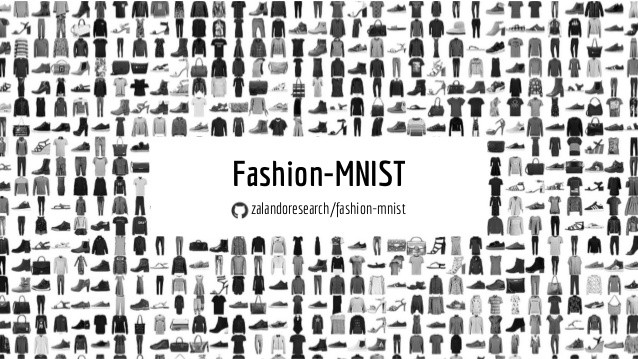

In [30]:
from IPython.display import Image
Image('fashion.jpeg')

### Tensorflow 2.0 Kurulumu

In [1]:
!pip install tensorflow-gpu==2.0.0.alpha0

     |████████████████████████████████| 332.1MB 69kB/s 
     |████████████████████████████████| 419kB 38.7MB/s 
     |████████████████████████████████| 3.0MB 23.3MB/s 


In [3]:
tf.__version__

'2.0.0-alpha0'

Gerekli kütüphanelerin import Edilmesi

In [0]:
import numpy as np
import datetime
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

FASHION MNIST veri setinin train ve test olarak alınması

In [4]:
#Loading the Fashion Mnist dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Train ve Test Verilerin Normalize Edilmesi

In [0]:
X_train = X_train / 255.0

In [0]:
X_test = X_test / 255.0

Yapay Sinir Ağı için Resimlerin Flatten Edilmesi

In [0]:
X_train = X_train.reshape(-1, 28*28)

In [8]:
X_train.shape

(60000, 784)

In [0]:
#Reshape the testing subset in the same way
X_test = X_test.reshape(-1, 28*28)

In [10]:
X_test.shape

(10000, 784)

### Model 1

In [0]:
model = tf.keras.models.Sequential()

In [0]:
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784, )))

In [0]:
model.add(tf.keras.layers.Dropout(0.2))

In [0]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 139us/sample - loss: 0.5284 - sparse_categorical_accuracy: 0.8128
Epoch 2/5
60000/60000 [==============================] - 8s 128us/sample - loss: 0.3995 - sparse_categorical_accuracy: 0.8547
Epoch 3/5
60000/60000 [==============================] - 8s 128us/sample - loss: 0.3654 - sparse_categorical_accuracy: 0.8666
Epoch 4/5
60000/60000 [==============================] - 8s 129us/sample - loss: 0.3455 - sparse_categorical_accuracy: 0.8719
Epoch 5/5
60000/60000 [==============================] - 8s 132us/sample - loss: 0.3314 - sparse_categorical_accuracy: 0.8781


In [18]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 86us/sample - loss: 0.3497 - sparse_categorical_accuracy: 0.8731


In [19]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.8730999827384949


In [0]:
model_json = model.to_json()
with open("fashion_model.json", "w") as json_file:
    json_file.write(model_json)

In [0]:
model.save_weights("fashion_model.h5")

### Model 2

In [0]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(units=32, activation='relu', input_shape=(784, )))
model2.add(tf.keras.layers.Dropout(0.4))
model2.add(tf.keras.layers.Dense(units=64, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.6))
model2.add(tf.keras.layers.Dense(units=128, activation='relu'))
model2.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [0]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [24]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 36,842
Trainable params: 36,842
Non-trainable params: 0
__________________________________________________

In [25]:
model2.fit(X_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 10s 164us/sample - loss: 0.9659 - sparse_categorical_accuracy: 0.6315
Epoch 2/10
60000/60000 [==============================] - 10s 163us/sample - loss: 0.7451 - sparse_categorical_accuracy: 0.7234
Epoch 3/10
60000/60000 [==============================] - 10s 162us/sample - loss: 0.6942 - sparse_categorical_accuracy: 0.7438
Epoch 4/10
60000/60000 [==============================] - 10s 162us/sample - loss: 0.6639 - sparse_categorical_accuracy: 0.7590
Epoch 5/10
60000/60000 [==============================] - 10s 162us/sample - loss: 0.6454 - sparse_categorical_accuracy: 0.7633
Epoch 6/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.6357 - sparse_categorical_accuracy: 0.7681
Epoch 7/10
60000/60000 [==============================] - 10s 162us/sample - loss: 0.6278 - sparse_categorical_accuracy: 0.7726
Epoch 8/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.6164 - sparse_categ

In [26]:
test_loss, test_accuracy = model2.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 89us/sample - loss: 0.6859 - sparse_categorical_accuracy: 0.7465


In [27]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7465000152587891


In [0]:
model_json2 = model2.to_json()
with open("fashion_model2.json", "w") as json_file:
    json_file.write(model_json2)

In [0]:
model2.save_weights("fashion_model2.h5")

### Model 3

In [0]:
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784, )))
model3.add(tf.keras.layers.Dropout(0.4))
model3.add(tf.keras.layers.Dense(units=256, activation='relu'))
model3.add(tf.keras.layers.Dropout(0.6))
model3.add(tf.keras.layers.Dense(units=128, activation='relu'))
model3.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [0]:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [33]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 167,690
Trainable params: 167,690
Non-trainable params: 0
________________________________________________

In [34]:
model3.fit(X_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 10s 167us/sample - loss: 0.6925 - sparse_categorical_accuracy: 0.7466
Epoch 2/10
60000/60000 [==============================] - 10s 165us/sample - loss: 0.5058 - sparse_categorical_accuracy: 0.8192
Epoch 3/10
60000/60000 [==============================] - 10s 165us/sample - loss: 0.4731 - sparse_categorical_accuracy: 0.8298
Epoch 4/10
60000/60000 [==============================] - 10s 164us/sample - loss: 0.4504 - sparse_categorical_accuracy: 0.8399
Epoch 5/10
60000/60000 [==============================] - 10s 165us/sample - loss: 0.4314 - sparse_categorical_accuracy: 0.8444
Epoch 6/10
60000/60000 [==============================] - 10s 165us/sample - loss: 0.4201 - sparse_categorical_accuracy: 0.8485
Epoch 7/10
60000/60000 [==============================] - 10s 163us/sample - loss: 0.4132 - sparse_categorical_accuracy: 0.8510
Epoch 8/10
60000/60000 [==============================] - 10s 163us/sample - loss: 0.4006 - sparse_categ

In [35]:
test_loss, test_accuracy = model3.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 96us/sample - loss: 0.3751 - sparse_categorical_accuracy: 0.8684


In [36]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.868399977684021


In [0]:
model_json3 = model3.to_json()
with open("fashion_model3.json", "w") as json_file:
    json_file.write(model_json3)

In [0]:
model3.save_weights("fashion_model3.h5")